Import các thư viện cần thiết

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Tạo dữ liệu ngẫu nhiên trong không gian 2 chiều

In [9]:
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)
print(X2)

[[4.49775285 1.46545116]
 [3.07311718 3.76212796]
 [3.52528933 1.59844519]
 [2.39091046 2.33431976]
 [3.12302646 1.41945943]
 [4.62359547 2.44921113]
 [3.38696098 2.46494505]
 [4.36167918 1.88637824]
 [3.21261415 2.40558547]
 [2.71754956 2.33882965]
 [4.01073111 0.96947283]
 [3.11892586 4.10522222]
 [2.29402636 2.07905375]
 [3.7365999  2.41022672]
 [4.29699439 2.79542218]
 [4.63617269 2.00962462]
 [2.84870815 1.77280105]
 [4.45368062 2.44805003]
 [4.97052399 1.86194687]
 [3.01324102 1.54377016]]


Minh họa trực quan dữ liệu

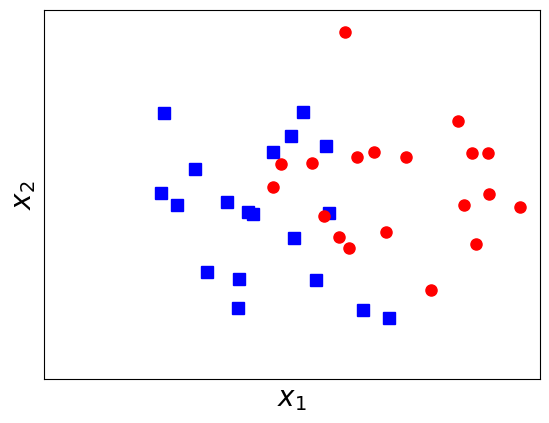

In [4]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

Các phương thức cần thiết cho mô hình logistic

In [5]:
# Evaluate g(z)
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    # method to calculate model logistic regression by Stochastic Gradient Descent method
    # eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    # loop of stochastic gradient descent
    while count < max_count:
    # shuffle the order of data (for stochastic gradient descent).
    # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

Bổ sung thêm cột X0 ≡1 vào bên trái để có dữ liệu Xbar = (1, X1, X2), khởi tạo xấp xỉ ban đầu cho bộ tham số w (chọn ngẫu nhiên bằng random), sau đó gọi hàm logistic_sigmoid_regression ở trên để thực hiện quá trình lặp gradient descent ngẫu nhiên tìm tham số tối ưu.

In [7]:
X = np.concatenate((X1, X2), axis = 0).T
print(X)
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init
# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])

[[ 1.92306918  2.90509186  1.58909188  2.76874122  2.52416203  2.02414192
   2.49174878  1.11439322  2.62561276  3.27183166  3.55617919  1.45945603
   2.87575608  2.30375703  1.08925412  4.09096119  1.80350003  1.25827634
   2.08532169  1.9340609   4.49775285  3.07311718  3.52528933  2.39091046
   3.12302646  4.62359547  3.38696098  4.36167918  3.21261415  2.71754956
   4.01073111  3.11892586  2.29402636  3.7365999   4.29699439  4.63617269
   2.84870815  4.45368062  4.97052399  3.01324102]
 [ 0.775673    1.7997662   1.16143907  1.07663514  1.53020387  1.80692632
   2.62943405  2.88348991  2.89077234  0.75454543  0.66250438  2.28222634
   2.52637908  2.46497356  2.01982447 -0.08330889  1.91837255  1.8856175
   1.79005729  1.09208652  1.46545116  3.76212796  1.59844519  2.33431976
   1.41945943  2.44921113  2.46494505  1.88637824  2.40558547  2.33882965
   0.96947283  4.10522222  2.07905375  2.41022672  2.79542218  2.00962462
   1.77280105  2.44805003  1.86194687  1.54377016]]


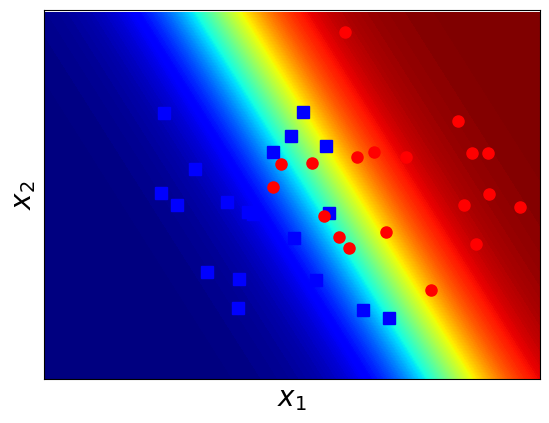

In [7]:
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()